In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(10,10)})

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Spotify_Sentiment_Analysis.csv',index_col=0)

In [3]:
df.head()

,Track name,Artist name,Track uri,Popularity,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration(ms),Key,Track type,sentiment,sentiment score
0,NaN,NaN,spotify:track:5igKYrnMvlFQsUCBKQZrk5,0,0.825,0.9670,-6.300,0.0,0.0582,0.1160,0.000000,0.1010,0.8070,129.982,248842.0,1.0,Punjabi,None,0.00
1,NaN,NaN,spotify:track:6DTaVOlpxrjuGJSwNB8Kg6,0,0.856,0.7590,-9.067,1.0,0.0370,0.0715,0.000065,0.3600,0.6460,111.968,266240.0,8.0,Telugu,None,0.00
2,"""O"" - 正.反.合. (Rearranged)",TVXQ!,spotify:track:26XKyMqXPg4w2DhJRTZ3jP,0,0.679,0.9380,-4.891,1.0,0.0646,0.0262,0.000006,0.9590,0.4600,115.010,334974.0,0.0,K-pop,Negative,24.81
3,#1,Aphex Twin,spotify:track:35NyjYJFaJxqbUF2y0jWl1,47,0.619,0.0327,-20.273,0.0,0.0371,0.9950,0.712000,0.0865,0.0785,102.884,447800.0,10.0,Student,None,0.00
4,#Peg Pugg,Deep Karan,spotify:track:3r8BUzdry4UNYZnjSQAgM7,38,0.719,0.9110,-3.012,1.0,0.0869,0.4890,0.000000,0.0592,0.8730,83.058,199224.0,1.0,Punjabi,None,0.00


In [4]:
df.describe()

,Popularity,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration(ms),Key,sentiment score
count,13319.000000,13319.000000,13319.00000,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000,13319.000000,1.331900e+04,13319.000000,13319.000000
mean,36.108867,0.586649,0.55509,-9.107483,0.624371,0.075908,0.457774,0.131747,0.170773,0.484281,117.448077,2.669623e+05,5.128763,19.054561
std,21.623466,0.173075,0.23497,5.542738,0.484303,0.075623,0.325514,0.296775,0.129595,0.246259,29.922456,1.996444e+05,3.519177,33.569125
min,0.000000,0.000000,0.00000,-44.508000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.002500e+04,0.000000,0.000000
25%,19.000000,0.473000,0.40100,-10.896500,0.000000,0.034700,0.149000,0.000000,0.095300,0.290000,93.978500,1.926430e+05,2.000000,0.000000
50%,37.000000,0.605000,0.57500,-7.786000,1.000000,0.045400,0.434000,0.000019,0.119000,0.484000,114.910000,2.285850e+05,5.000000,0.000000
75%,51.000000,0.716000,0.73600,-5.554000,1.000000,0.078800,0.757000,0.007615,0.201000,0.680500,137.701000,2.840745e+05,8.000000,29.305000
max,100.000000,0.998000,0.99700,0.877000,1.000000,0.903000,0.996000,0.993000,0.994000,0.980000,218.971000,4.581483e+06,11.000000,99.890000


# Data Cleaning

In [5]:
df=df[df['Track name'].notnull()]

In [6]:
df['Duration(minutes)']=df['Duration(ms)'].apply(lambda x: x/60000)
df=df.drop('Duration(ms)',axis=1)

In [7]:
df.head()

,Track name,Artist name,Track uri,Popularity,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,Track type,sentiment,sentiment score,Duration(minutes)
2,"""O"" - 正.反.合. (Rearranged)",TVXQ!,spotify:track:26XKyMqXPg4w2DhJRTZ3jP,0,0.679,0.9380,-4.891,1.0,0.0646,0.0262,0.000006,0.9590,0.4600,115.010,0.0,K-pop,Negative,24.81,5.582900
3,#1,Aphex Twin,spotify:track:35NyjYJFaJxqbUF2y0jWl1,47,0.619,0.0327,-20.273,0.0,0.0371,0.9950,0.712000,0.0865,0.0785,102.884,10.0,Student,None,0.00,7.463333
4,#Peg Pugg,Deep Karan,spotify:track:3r8BUzdry4UNYZnjSQAgM7,38,0.719,0.9110,-3.012,1.0,0.0869,0.4890,0.000000,0.0592,0.8730,83.058,1.0,Punjabi,None,0.00,3.320400
5,#tb,015B,spotify:track:3OboGw2I8oYsEHeCrZ7NLT,46,0.738,0.4140,-5.756,1.0,0.0323,0.5310,0.000000,0.0893,0.2450,97.456,6.0,K-pop,None,0.00,4.586667
6,'02 Thicke,Shalom Dubas,spotify:track:2sRjnBaOxeLL6QEL4SdyX2,21,0.366,0.6190,-8.164,0.0,0.1410,0.7080,0.000002,0.1200,0.6980,177.722,6.0,RADAR,None,0.00,2.040817


In [8]:
# Before

(df['sentiment'].value_counts()*100)/len(df['sentiment'])

Neutral     38.574754
None        33.430953
Positive    18.487647
Negative     9.506646
Name: sentiment, dtype: float64

In [9]:
df=df[df['sentiment']!='None']
df.reset_index(drop=True,inplace=True)

In [10]:
# After

(df['sentiment'].value_counts()*100)/len(df['sentiment'])

Neutral     57.946983
Positive    27.772138
Negative    14.280880
Name: sentiment, dtype: float64

In [11]:
label_encoder = LabelEncoder()
df['sentiment']=label_encoder.fit_transform(df['sentiment'])

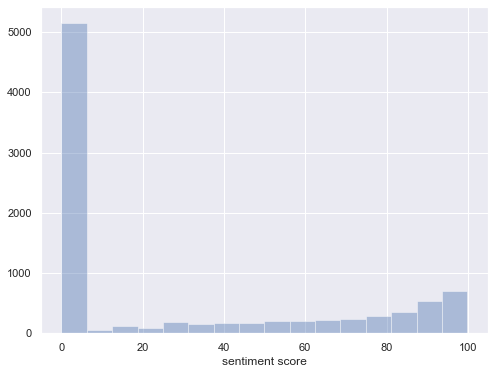

In [12]:
plt.figure(figsize=(8, 6))
sns.distplot(df['sentiment score'],kde=False)
plt.show()

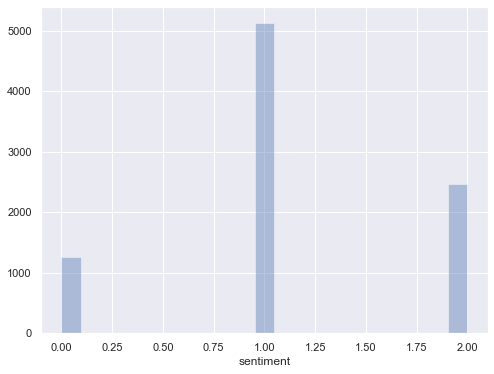

In [13]:
plt.figure(figsize=(8,6))
sns.distplot(df['sentiment'],kde=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# EDA

In [14]:
df = df.select_dtypes(include=[np.number])

In [15]:
mnmx=MinMaxScaler()
mnmx_df=mnmx.fit_transform(df)
mnmx_df=pd.DataFrame(mnmx_df)
mnmx_df.columns=df.columns

In [16]:
mnmx_df.describe()

,Popularity,Danceability,Energy,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Key,sentiment,sentiment score,Duration(minutes)
count,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000,8865.000000
mean,0.425345,0.580239,0.564970,0.796872,0.626622,0.058168,0.424691,0.113877,0.157321,0.471823,0.464004,0.466339,0.567456,0.286596,0.047431
std,0.214208,0.186953,0.238124,0.123183,0.483729,0.083232,0.324630,0.281841,0.132826,0.249089,0.162896,0.320783,0.317165,0.377114,0.032724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290000,0.460428,0.410258,0.762000,0.000000,0.013398,0.119465,0.000000,0.081620,0.277321,0.336994,0.181818,0.500000,0.000000,0.034538
50%,0.440000,0.601563,0.589089,0.826915,1.000000,0.024980,0.366456,0.000010,0.105120,0.463450,0.448702,0.454545,0.500000,0.000000,0.042021
75%,0.570000,0.718814,0.748832,0.874203,1.000000,0.060747,0.721883,0.002795,0.182753,0.665176,0.568299,0.727273,1.000000,0.659525,0.053235
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

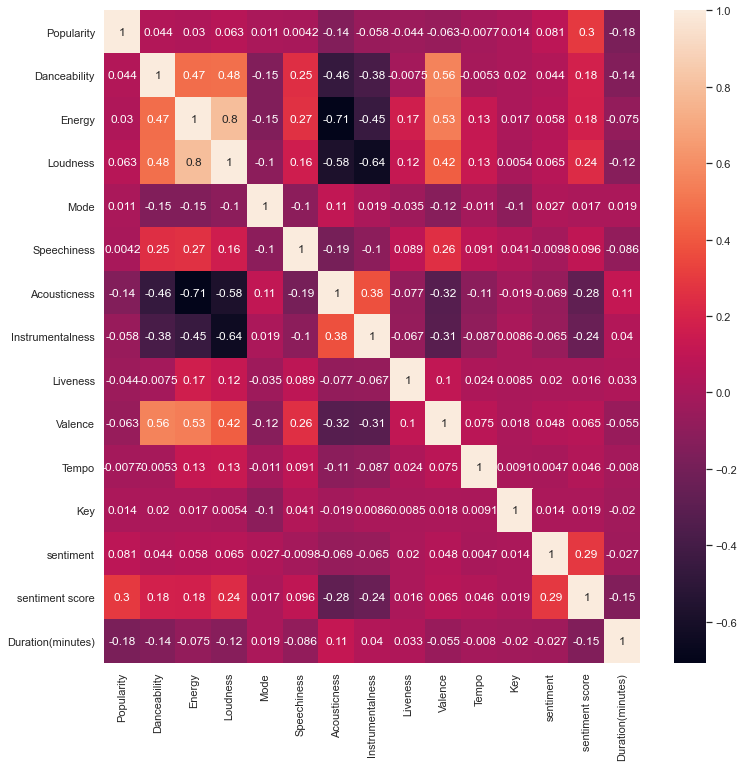

In [17]:
mnmx_corr=mnmx_df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(mnmx_corr,annot=True)

In [18]:
mnmx_corr['sentiment'].abs().sort_values(ascending=False)

sentiment            1.000000
sentiment score      0.291337
Popularity           0.080742
Acousticness         0.069295
Instrumentalness     0.065278
Loudness             0.065269
Energy               0.058129
Valence              0.047953
Danceability         0.043834
Mode                 0.027413
Duration(minutes)    0.027250
Liveness             0.019729
Key                  0.013500
Speechiness          0.009831
Tempo                0.004691
Name: sentiment, dtype: float64

In [19]:
def redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0,len(df.columns)):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [20]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(mnmx_df, 20))

Top Absolute Correlations
Energy            Loudness            0.799779
                  Acousticness        0.706642
Loudness          Instrumentalness    0.644793
                  Acousticness        0.577721
Danceability      Valence             0.557117
Energy            Valence             0.534270
Danceability      Loudness            0.483006
                  Energy              0.474714
                  Acousticness        0.463376
Energy            Instrumentalness    0.447402
Loudness          Valence             0.421089
Danceability      Instrumentalness    0.380196
Acousticness      Instrumentalness    0.375727
                  Valence             0.324975
Instrumentalness  Valence             0.314335
Popularity        sentiment score     0.295215
sentiment         sentiment score     0.291337
Acousticness      sentiment score     0.284064
Energy            Speechiness         0.265239
Speechiness       Valence             0.255929
dtype: float64


In [21]:
def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(mnmx_df, 20))

Top Absolute Correlations
Energy            Loudness            0.799779
                  Acousticness        0.706642
Loudness          Instrumentalness    0.644793
                  Acousticness        0.577721
Danceability      Valence             0.557117
Energy            Valence             0.534270
Danceability      Loudness            0.483006
                  Energy              0.474714
                  Acousticness        0.463376
Energy            Instrumentalness    0.447402
Loudness          Valence             0.421089
Danceability      Instrumentalness    0.380196
Acousticness      Instrumentalness    0.375727
                  Valence             0.324975
Instrumentalness  Valence             0.314335
Popularity        sentiment score     0.295215
sentiment         sentiment score     0.291337
Acousticness      sentiment score     0.284064
Energy            Speechiness         0.265239
Speechiness       Valence             0.255929
dtype: float64


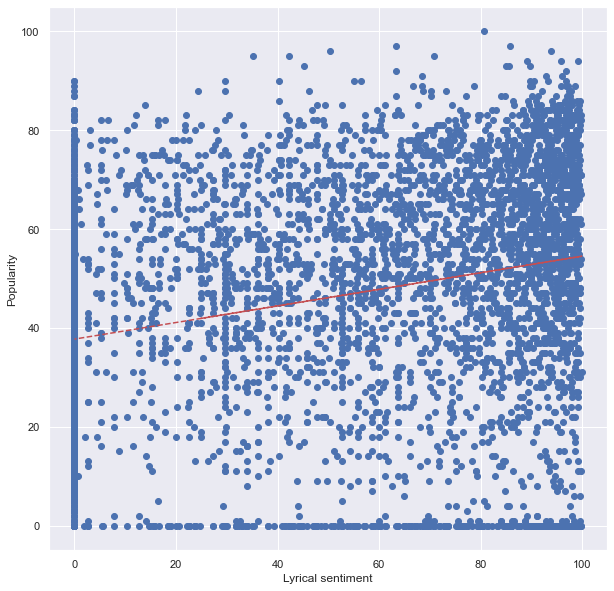

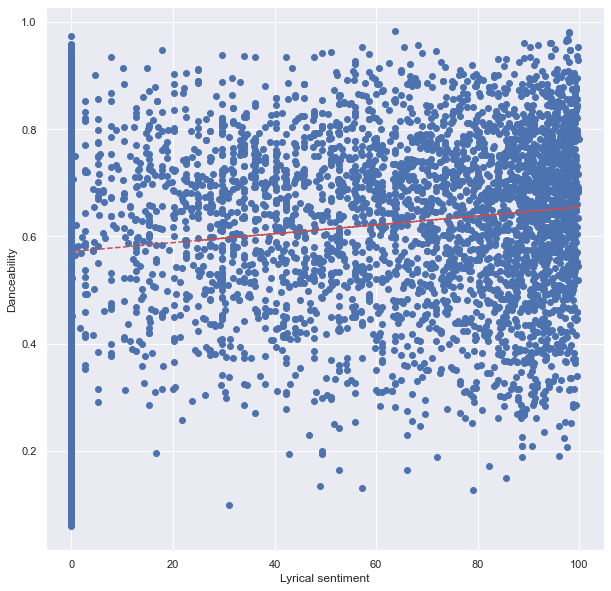

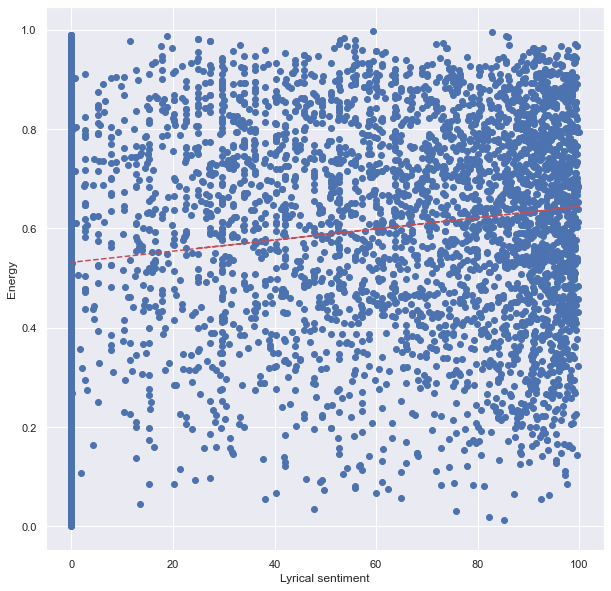

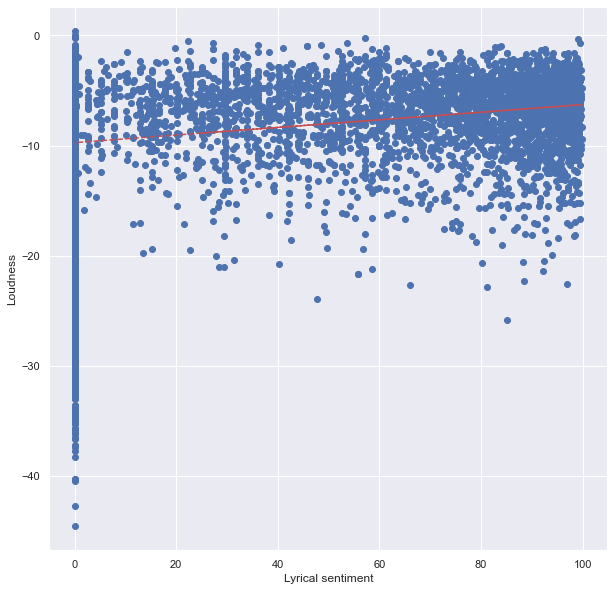

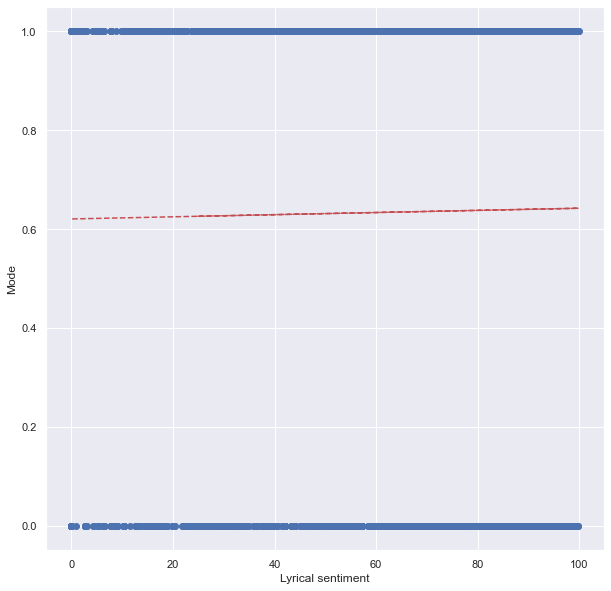

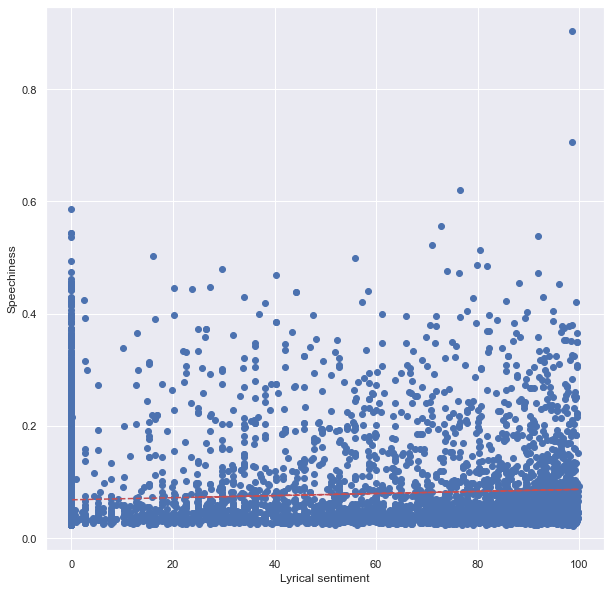

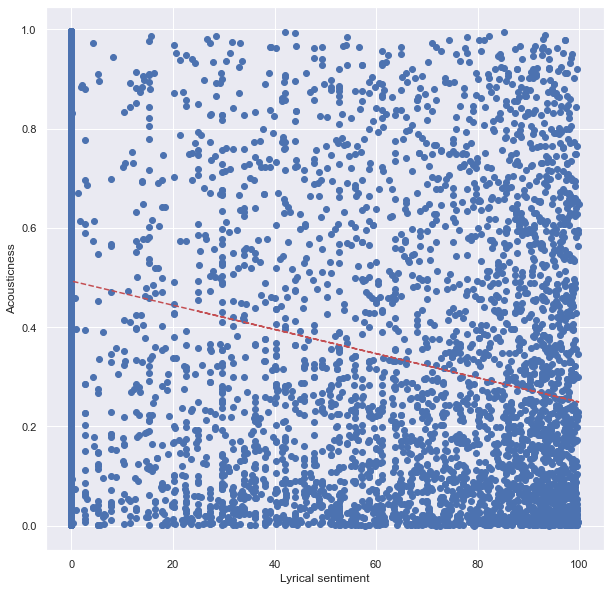

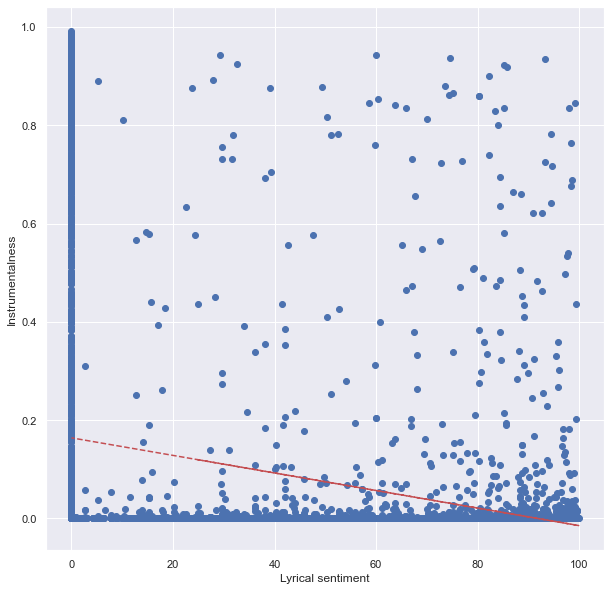

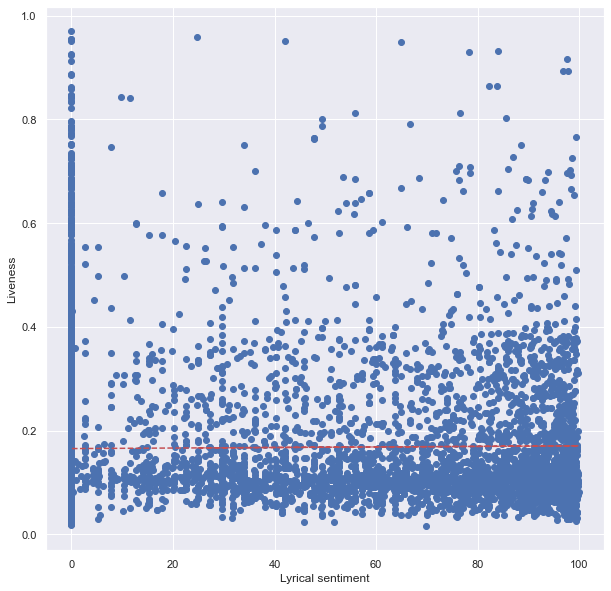

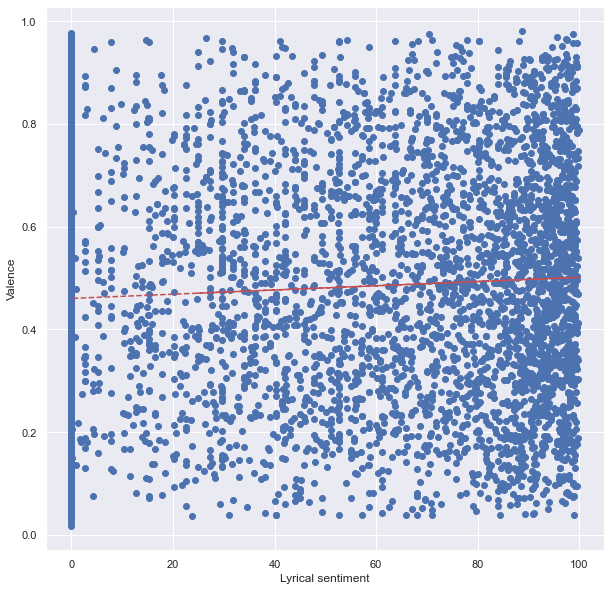

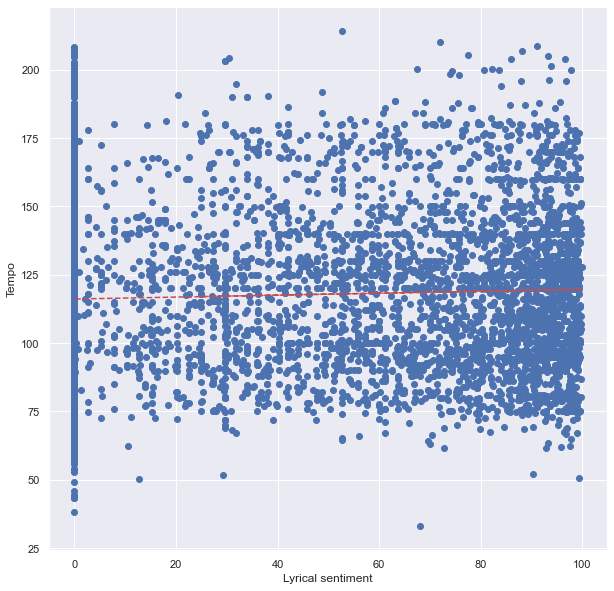

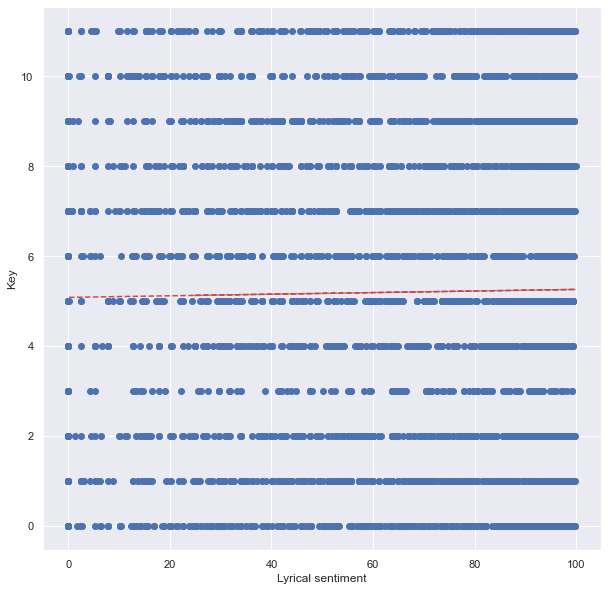

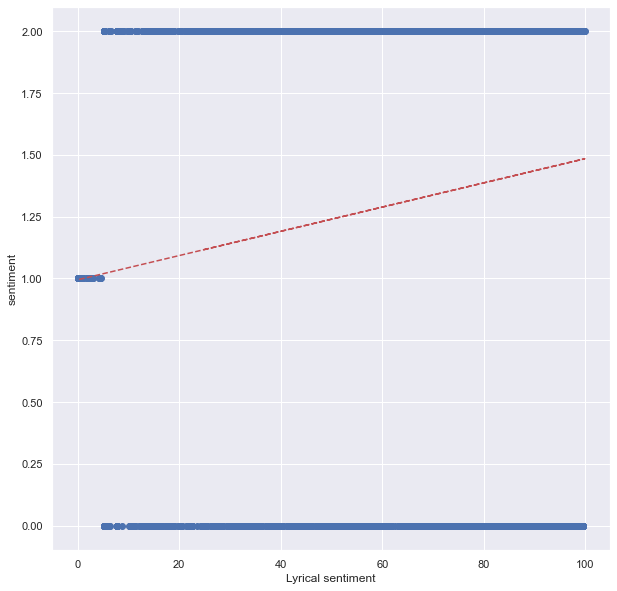

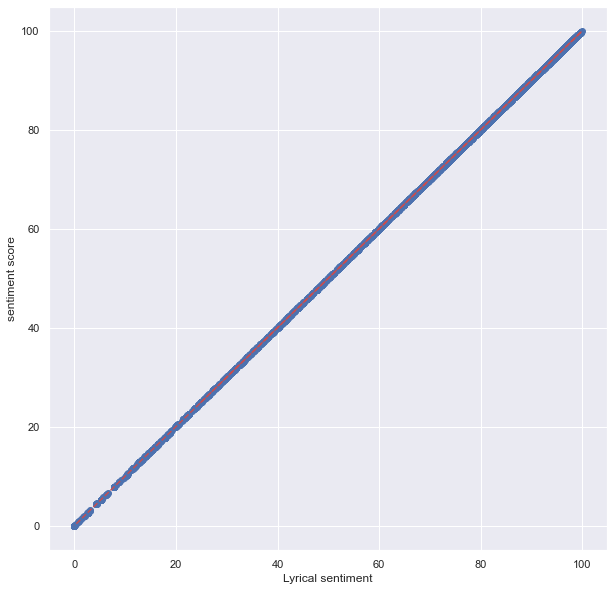

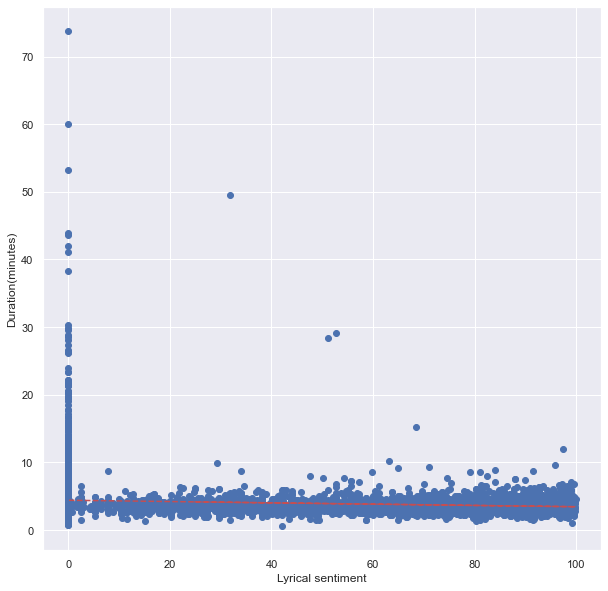

In [22]:
for col in df:
    try:
        x = df['sentiment score']
        y = df[col]

        # Calculate trendline
        reg = np.polyfit(x,y,1)
        trendline = np.poly1d(reg)

        # Scatterplot with trendline
        fig, ax = plt.subplots()
        ax.scatter(x, y)
        ax.plot(x,trendline(x),'r--')
        ax.set_xlabel('Lyrical sentiment')
        ax.set_ylabel(col)
    except:
        print(col)

Doesn't look like that most audio features have very high correlations with lyrical sentiment.

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

#  <b>Feature Selection</b>

## Univariate Selection

In [23]:
y = df.loc[:, 'sentiment']
X = df.drop(['sentiment','sentiment score'],axis=1)

In [24]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2

In [25]:
mnmx=MinMaxScaler()
norm_X=mnmx.fit_transform(X)
norm_X=pd.DataFrame(norm_X)
norm_X.columns=X.columns

In [26]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(norm_X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(norm_X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                Specs       Score
7    Instrumentalness  442.836796
6        Acousticness  210.594250
0          Popularity   82.619625
2              Energy   37.301762
1        Danceability   20.285043
5         Speechiness   14.835555
3            Loudness   11.666680
9             Valence    6.577481
12  Duration(minutes)    5.818468
4                Mode    2.675917
10              Tempo    1.340189
11                Key    1.130013
8            Liveness    0.994087


## Feature Selection Using Random Forest

In [47]:
from sklearn.feature_selection import SelectFromModel

rf=RandomForestClassifier()
sel = SelectFromModel(rf)
sel.fit(X_test, y_test)

SelectFromModel(estimator=RandomForestClassifier())

In [48]:
sel.get_support()

array([ True, False,  True,  True, False,  True,  True, False, False,
       False, False, False,  True])

In [49]:
selected_feat= X.columns[(sel.get_support())]
selected_feat

Index(['Popularity', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Duration(minutes)'],
      dtype='object')

## Backward Feature Selection

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

ModuleNotFoundError: No module named 'mlxtend'

In [50]:
rf=RandomForestClassifier()
sfs1 = sfs(rf, k_features=5, forward=False, verbose=2, scoring='accuracy',cv=5)

NameError: name 'sfs' is not defined

In [258]:
sfs1 = sfs1.fit(X, y)

In [259]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Popularity', 'Loudness', 'Acousticness', 'Instrumentalness', 'Duration(ms)']


## Feature Selection Using Correlation

<AxesSubplot:>

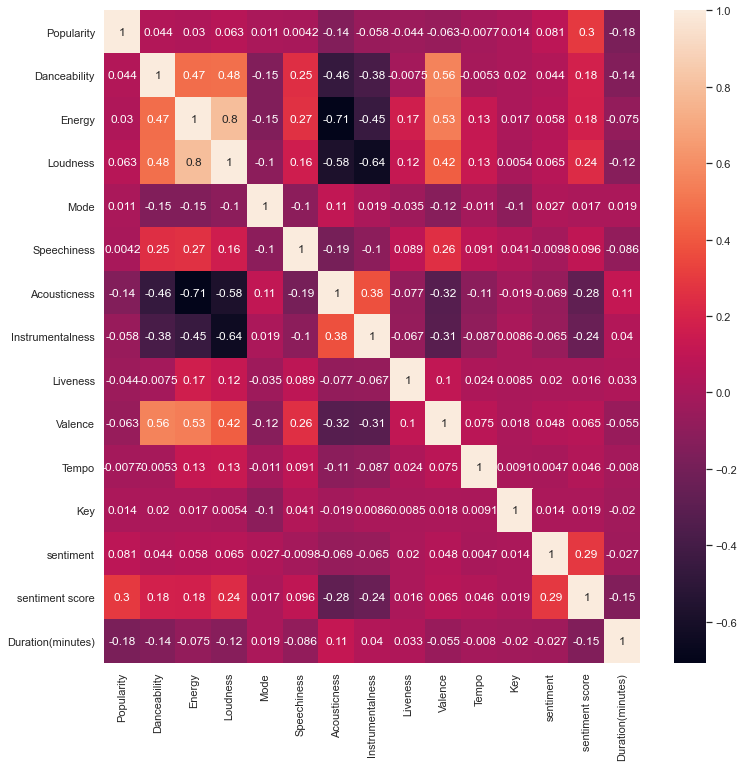

In [24]:
mnmx_corr=mnmx_df.corr()

plt.figure(figsize=(12,12))
sns.heatmap(mnmx_corr,annot=True)

In [26]:
mnmx_corr['sentiment'].sort_values(ascending=False)

sentiment            1.000000
sentiment score      0.291337
Popularity           0.080742
Loudness             0.065269
Energy               0.058129
Valence              0.047953
Danceability         0.043834
Mode                 0.027413
Liveness             0.019729
Key                  0.013500
Tempo                0.004691
Speechiness         -0.009831
Duration(minutes)   -0.027250
Instrumentalness    -0.065278
Acousticness        -0.069295
Name: sentiment, dtype: float64

## Feature Importance in Tree Models

In [23]:
def feature_importance(clf1,clf2,clf3):
    feature_importance=pd.DataFrame({
    'Random Forest':clf1.feature_importances_,
    'Decision Tree':clf2.feature_importances_,
    'Gradient Boost':clf3.feature_importances_},index=X.columns)
    
    feature_importance.sort_values(by='Random Forest',ascending=True,inplace=True)
    
    Y_axis = np.arange(len(feature_importance))
    w=0.3
    fig, ax = plt.subplots(figsize=(18,8))
    rfc_feature=ax.barh(Y_axis,feature_importance['Random Forest'],w,color='r',label='Random Forest')
    dt_feature=ax.barh(Y_axis+w,feature_importance['Decision Tree'],w,color='g',label='Decision Tree')
    grad_feature=ax.barh(Y_axis+w*2,feature_importance['Gradient Boost'],w,color='b',label='Gradient Boost')
    
    ax.set(yticks=Y_axis+w,yticklabels=feature_importance.index)

    ax.legend()
    plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# <b>Classification</b>

In [24]:
from sklearn.metrics import accuracy_score,f1_score,classification_report

def assess_model(*clfs):

    for clf in clfs:
        results = clf.predict(X_test)

        accuracy = accuracy_score(y_test, results)
        print("{b} - Accuracy score: {a} ".format(a=accuracy,b=clf.__class__.__name__))
        print('\n')
        print('{} - Classification Report:\n'.format(clf.__class__.__name__))
        report = classification_report(y_test, results)
        print(report)
        print('\n')

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score,auc,confusion_matrix

def plot_roc(clf):
    fpr, tpr, threshold = roc_curve(y_true=y_test,y_score=[x[1] for x in clf.predict_proba(X_test)],pos_label=1)
    auc_clf=round(auc(fpr,tpr),3)
    
    plt.figure(figsize=(5, 5), dpi=100)

    plt.plot(fpr, tpr, linestyle='-', label='({} - AUC ={})'.format(clf.__class__.__name__,auc_clf)) 
    plt.plot([0, 1], [0, 1], '--', color='black', label='Random Guess')
    
    
    plt.xlabel("False Positive Rate -->")
    plt.ylabel('True Positive Rate -->')

    plt.legend()
               
    plt.show()

<br/>
<br/>
<br/>
<br/>

In [26]:
y = df.loc[:, 'sentiment']
X = df.drop(['sentiment','sentiment score'],axis=1)

In [27]:
scaler= StandardScaler() 
X1=scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test =train_test_split(X1, y, train_size=0.7, random_state=20)

In [76]:
knn_model=KNeighborsClassifier()

dec_model= DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=8,
                       min_samples_leaf=4)

mlp_model= MLPClassifier()

svm_model= SVC(probability=True)

rf_model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

grad_model=GradientBoostingClassifier()

In [77]:
knn_model.fit(X_train, y_train) 
dec_model.fit(X_train, y_train) 
mlp_model.fit(X_train, y_train) 
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [82]:
from sklearn.metrics import precision_score


knn_precision=precision_score(y_test, knn_model.predict(X_test),average='weighted')
dec_precision=precision_score(y_test, dec_model.predict(X_test),average='weighted')
mlp_precision=precision_score(y_test, mlp_model.predict(X_test),average='weighted')
svm_precision=precision_score(y_test, svm_model.predict(X_test),average='weighted')
rf_precision=precision_score(y_test, rf_model.predict(X_test),average='weighted')
grad_precision=precision_score(y_test, grad_model.predict(X_test),average='weighted')

In [88]:
fig = px.bar(
    x=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"], 
    y=[knn_precision, dec_precision, mlp_precision, svm_precision,rf_precision,grad_precision],
    range_y=[0,1],
    color=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"],
    labels={'x': "Model", 'y': "Precision"}, 
    title="Precision Score"
)
fig.show()

In [84]:
from sklearn.metrics import f1_score


knn_f1=f1_score(y_test, knn_model.predict(X_test),average='weighted')
dec_f1=f1_score(y_test, dec_model.predict(X_test),average='weighted')
mlp_f1=f1_score(y_test, mlp_model.predict(X_test),average='weighted')
svm_f1=f1_score(y_test, svm_model.predict(X_test),average='weighted')
rf_f1=f1_score(y_test, rf_model.predict(X_test),average='weighted')
grad_f1=f1_score(y_test, grad_model.predict(X_test),average='weighted')

In [87]:
fig = px.bar(
    x=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"], 
    y=[knn_f1, dec_f1, mlp_f1, svm_f1,rf_f1,grad_f1],
    range_y=[0,1],
    color=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"],
    labels={'x': "Model", 'y': "F1 Score"}, 
    title="F1 Score"
)
fig.show()

In [80]:
knn_acc = knn_model.score (X_test, y_test)

dec_acc = dec_model.score (X_test, y_test)

mlp_acc = mlp_model.score (X_test, y_test)

svm_acc = svm_model.score(X_test, y_test)

rf_acc=rf_model.score(X_test, y_test)

grad_acc=grad_model.score(X_test, y_test)

In [81]:
fig = px.bar(
    x=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"], 
    y=[knn_acc, dec_acc, mlp_acc, svm_acc,rf_acc,grad_acc],
    range_y=[0,1],
    color=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"],
    labels={'x': "Model", 'y': "Accuracy"}, 
    title="Model Accuracy Comparison"
)
fig.show()

In [44]:
assess_model(knn_model,dec_model,mlp_model,svm_model,rf_model,grad_model)

KNeighborsClassifier - Accuracy score: 0.6157894736842106 


KNeighborsClassifier - Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.19      0.22       390
           1       0.72      0.84      0.78      1564
           2       0.46      0.35      0.40       706

    accuracy                           0.62      2660
   macro avg       0.48      0.46      0.46      2660
weighted avg       0.58      0.62      0.59      2660



DecisionTreeClassifier - Accuracy score: 0.5827067669172933 


DecisionTreeClassifier - Classification Report:

              precision    recall  f1-score   support

           0       0.27      0.27      0.27       390
           1       0.74      0.73      0.74      1564
           2       0.42      0.43      0.42       706

    accuracy                           0.58      2660
   macro avg       0.48      0.48      0.48      2660
weighted avg       0.59      0.58      0.58      2660



MLPClassifier 

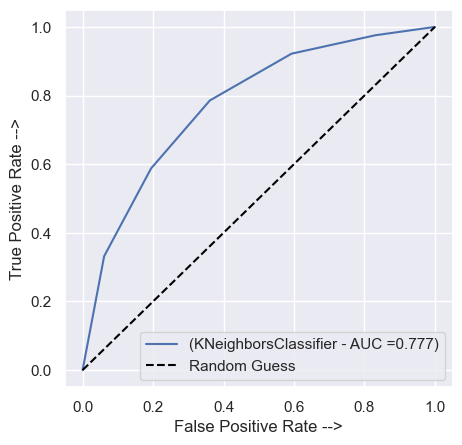

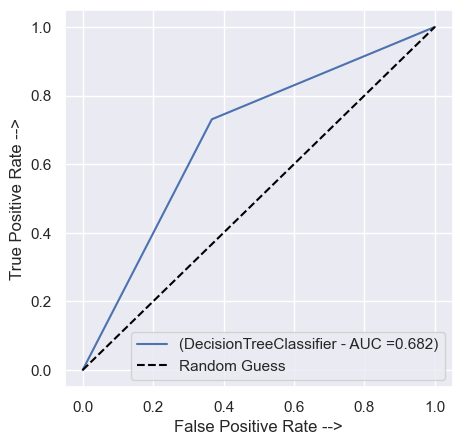

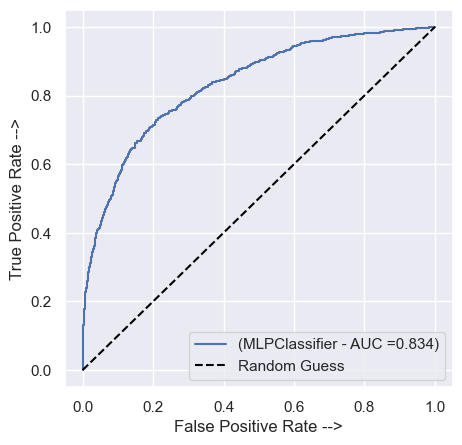

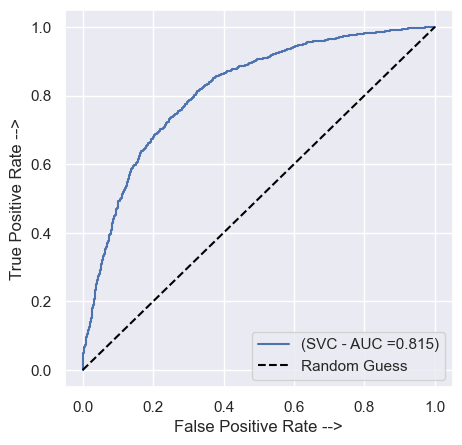

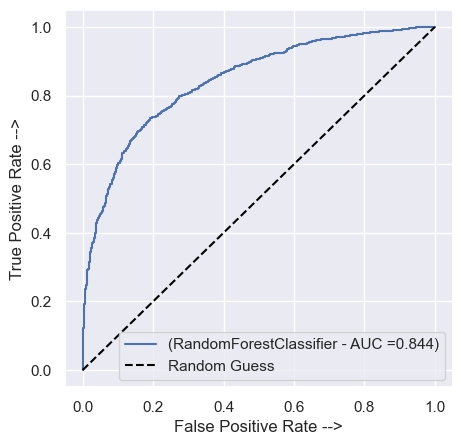

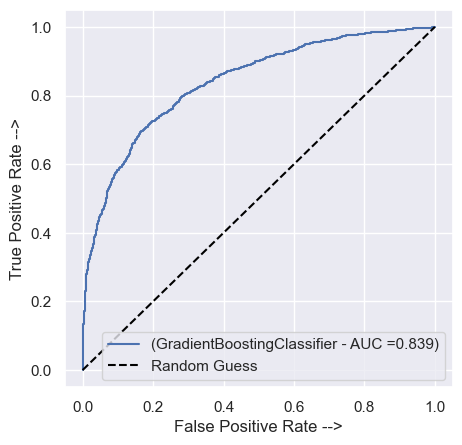

In [45]:
plot_roc(knn_model)
plot_roc(dec_model)
plot_roc(mlp_model)
plot_roc(svm_model)
plot_roc(rf_model)
plot_roc(grad_model)

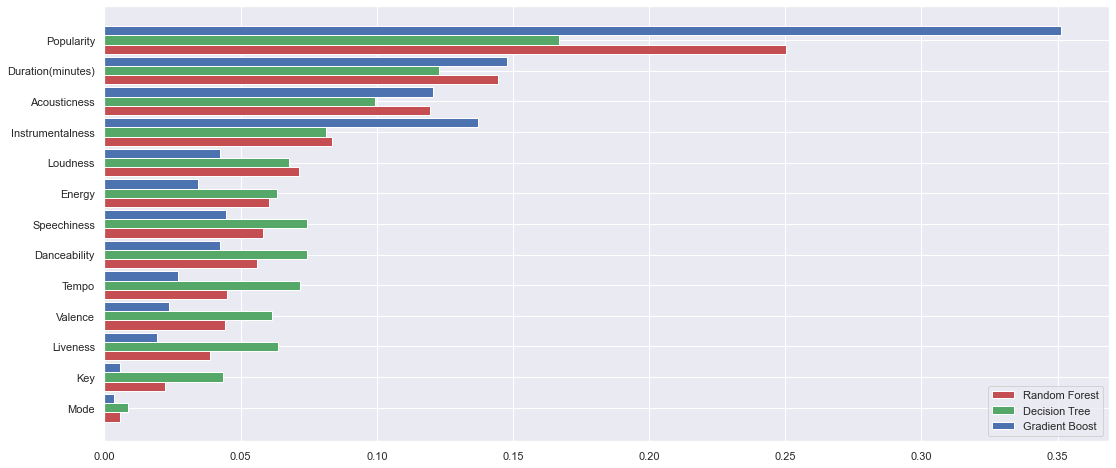

In [46]:
feature_importance(rf_model,dec_model,grad_model)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Oversampling Unbalanced Dataset using SMOTE

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,accuracy_score,balanced_accuracy_score

In [139]:
y = df.loc[:, 'sentiment']
X = df.drop(['sentiment','sentiment score'],axis=1)

In [140]:
scaler= StandardScaler() 
X1=scaler.fit_transform(X)

In [141]:
oversample = SMOTE()
X1, y = oversample.fit_resample(X1, y)

In [142]:
from collections import Counter

Class=0, n=5137 (33.333%)
Class=1, n=5137 (33.333%)
Class=2, n=5137 (33.333%)


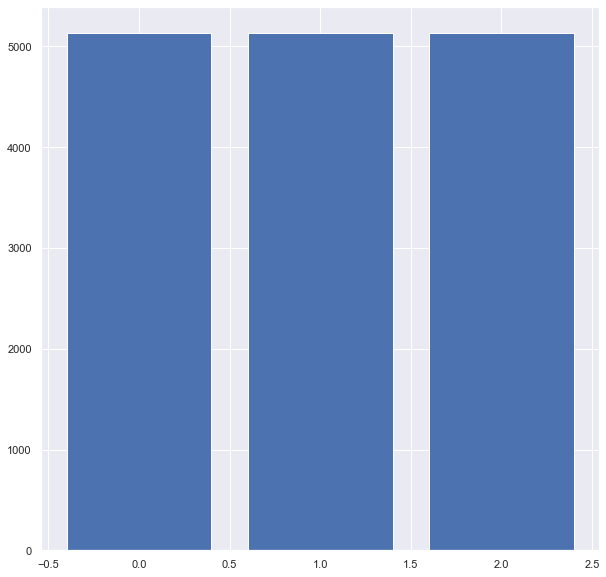

In [143]:
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [144]:
X_train, X_test, y_train, y_test =train_test_split(X1, y, train_size=0.6, random_state=20)

In [153]:
knn_model=KNeighborsClassifier()

dec_model= DecisionTreeClassifier(criterion='entropy', max_features=9, min_samples_leaf=7)

mlp_model= MLPClassifier()

svm_model= SVC(probability=True)

rf_model=RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

grad_model=GradientBoostingClassifier()

In [154]:
knn_model.fit(X_train, y_train) 
dec_model.fit(X_train, y_train) 
mlp_model.fit(X_train, y_train) 
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
grad_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [157]:
knn_acc = knn_model.score (X_test, y_test)

dec_acc = dec_model.score (X_test, y_test)

mlp_acc = mlp_model.score (X_test, y_test)

svm_acc = svm_model.score(X_test, y_test)

rf_acc=rf_model.score(X_test, y_test)

grad_acc=grad_model.score(X_test, y_test)

In [158]:
fig = px.bar(
    x=[ "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"], 
    y=[knn_acc, dec_acc, mlp_acc, svm_acc,rf_acc,grad_acc],
    range_y=[0,1],
    color=[ "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"],
    labels={'x': "Model", 'y': "Accuracy"}, 
    title="Model Accuracy Comparison"
)
fig.show()

In [159]:
assess_model(knn_model,dec_model,mlp_model,svm_model,rf_model,grad_model)

KNeighborsClassifier - Accuracy score: 0.7103000811030008 


KNeighborsClassifier - Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.90      0.76      2024
           1       0.80      0.59      0.68      2071
           2       0.73      0.65      0.68      2070

    accuracy                           0.71      6165
   macro avg       0.73      0.71      0.71      6165
weighted avg       0.73      0.71      0.71      6165



DecisionTreeClassifier - Accuracy score: 0.5899432278994323 


DecisionTreeClassifier - Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.60      0.59      2024
           1       0.66      0.64      0.65      2071
           2       0.54      0.53      0.53      2070

    accuracy                           0.59      6165
   macro avg       0.59      0.59      0.59      6165
weighted avg       0.59      0.59      0.59      6165



MLPClassifier 

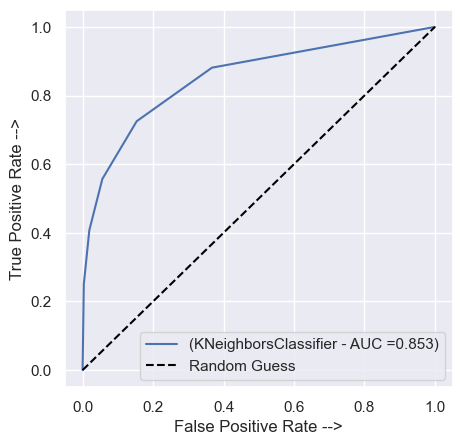

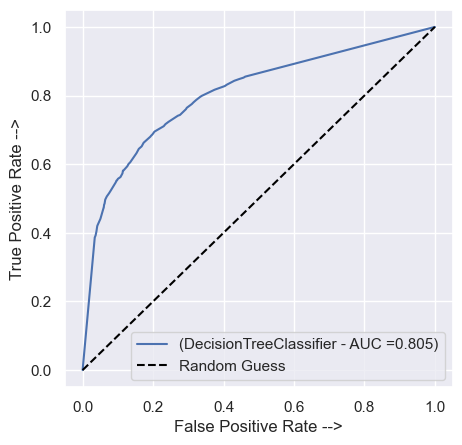

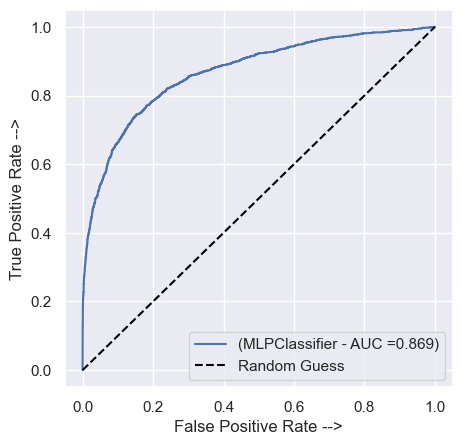

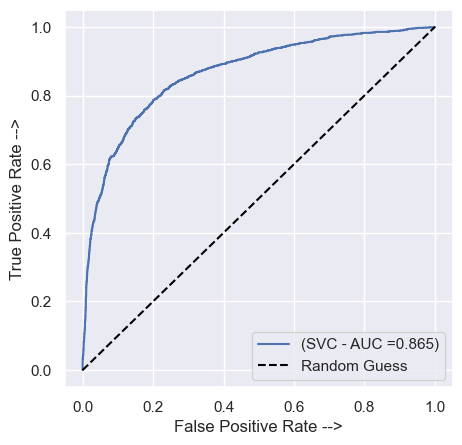

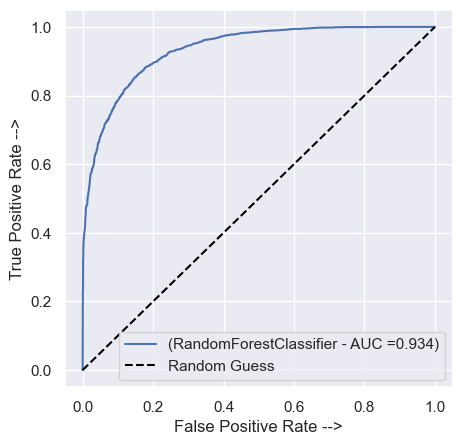

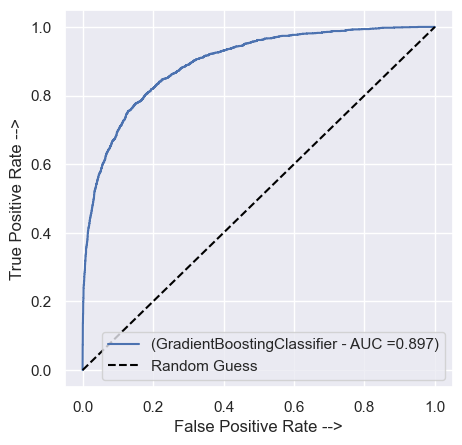

In [160]:
plot_roc(knn_model)
plot_roc(dec_model)
plot_roc(mlp_model)
plot_roc(svm_model)
plot_roc(rf_model)
plot_roc(grad_model)

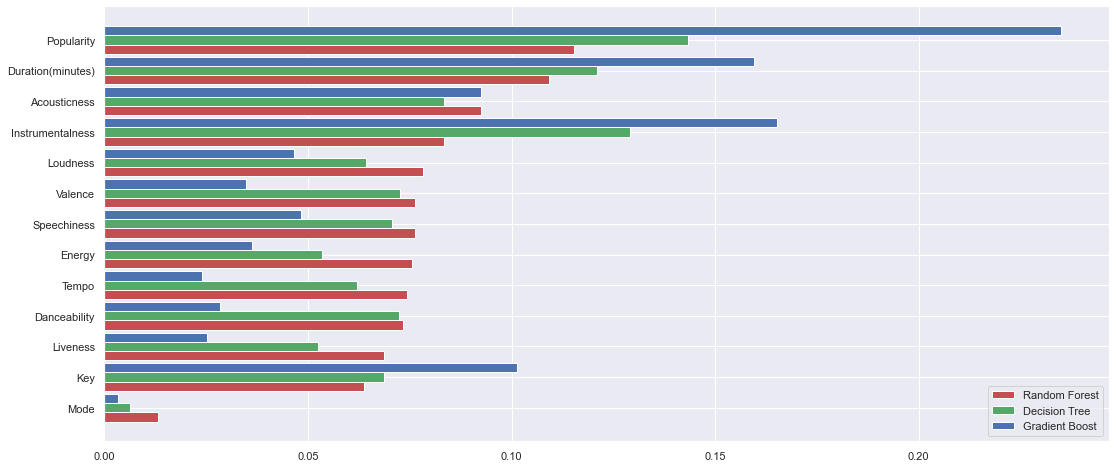

In [161]:
feature_importance(rf_model,dec_model,grad_model)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Cross Validation

In [134]:
knn_model=KNeighborsClassifier()

dec_model= DecisionTreeClassifier()

mlp_model= MLPClassifier()

svm_model= SVC()

rf_model=RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

grad_model=GradientBoostingClassifier()

In [135]:
knn_score=cross_validate(knn_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

dec_score=cross_validate(dec_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

mlp_score=cross_validate(mlp_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

svm_score=cross_validate(svm_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

rf_score=cross_validate(rf_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

grad_score=cross_validate(grad_model,X_train,y_train,cv=10,n_jobs=-1,scoring="accuracy")

In [136]:
fig = px.bar(
    x=[ "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"], 
    y=[ knn_score['test_score'].mean(), dec_score['test_score'].mean(), mlp_score['test_score'].mean(), svm_score['test_score'].mean(),rf_score['test_score'].mean(),grad_score['test_score'].mean()],
    range_y=[0,1],
    color=["K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Support Vector Machine","Random Forest","Gradient Boost"],
    labels={'x': "Model", 'y': "Accuracy"}, 
    title="Model Accuracy Score Comparison - Sentiment(SMOTE & Cross Validation)"
)
fig.show()

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# Hyperparameter Tuning

In [89]:
y = df.loc[:, 'sentiment']
X = df.drop(['sentiment','sentiment score'],axis=1)

In [90]:
scaler= StandardScaler() 
X1=scaler.fit_transform(X)

In [99]:
# for imbalanced skip this step

oversample = SMOTE()
X1, y = oversample.fit_resample(X1, y)

In [100]:
X_train, X_test, y_train, y_test =train_test_split(X1, y, train_size=0.7, random_state=20)

In [101]:
knn_model=KNeighborsClassifier()

dec_model= DecisionTreeClassifier()

mlp_model= MLPClassifier()

svm_model= SVC()

rf_model=RandomForestClassifier()

grad_model=GradientBoostingClassifier()

In [102]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [103]:
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 62.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [115]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000)

### Decision Tree Hyperparameters

In [109]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=7,
                       min_samples_leaf=6)
param_dist = {"max_depth": [1,2,3,4,5,6,7,8,9, None],
              "max_features": [1,2,3,4,5,6,7,8,9],
              "min_samples_leaf":[1,2,3,4,5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

# Fit it to the data
tree_cv.fit(X_train,y_train)


RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=9, max_features=7,
                                                    min_samples_leaf=6),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9]})

In [110]:
tree_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features=9, min_samples_leaf=7)